## **Part 1 ‑ Exploratory Data Analysis**
---
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

---

In [1]:
import pandas as pd , matplotlib.pyplot as plt, numpy as np, seaborn as sns, datetime as dt

In [2]:
# Import logins.json file
logins = pd.read_json('logins.json')

In [3]:
# Quick view of dataframe.
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.shape

(93142, 1)

In [5]:
logins['count'] = 1

In [6]:
logins = logins.set_index('login_time').resample('15MIN').sum()

In [7]:
# Get weekday, hour, date and month and add to dataframe.
logins['weekday'] = logins.index.dayofweek
logins['hour'] = logins.index.hour
logins['date'] = logins.index.day
logins['month'] = logins.index.month

In [8]:
logins.head()

,count,weekday,hour,date,month
login_time,,,,,
1970-01-01 20:00:00,2,3,20,1,1
1970-01-01 20:15:00,6,3,20,1,1
1970-01-01 20:30:00,9,3,20,1,1
1970-01-01 20:45:00,7,3,20,1,1
1970-01-01 21:00:00,1,3,21,1,1


In [9]:
logins['count'].sum()

93142

Text(0, 0.5, 'Total Logins')

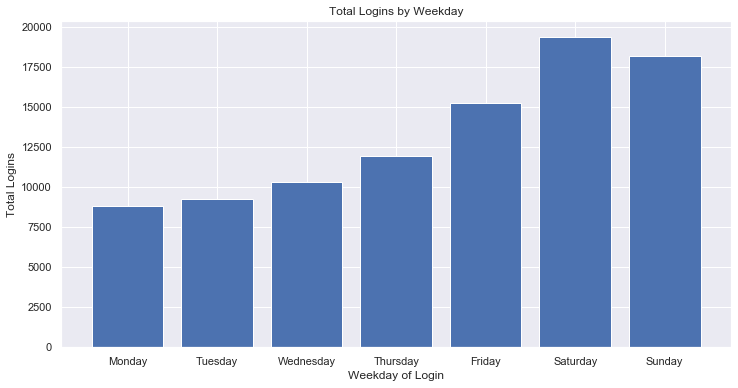

In [10]:
# Group by hour and plot total number of logins by time of day.
weekdaydf = logins.groupby('weekday').sum()

sns.set()
plt.figure(figsize=(12,6))
plt.xticks(weekdaydf.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.bar(weekdaydf.index, weekdaydf['count'])
plt.title('Total Logins by Weekday')
plt.xlabel('Weekday of Login')
plt.ylabel('Total Logins')


The plot shows that the most logins occur during the weekends.

Text(0, 0.5, 'Total Logins')

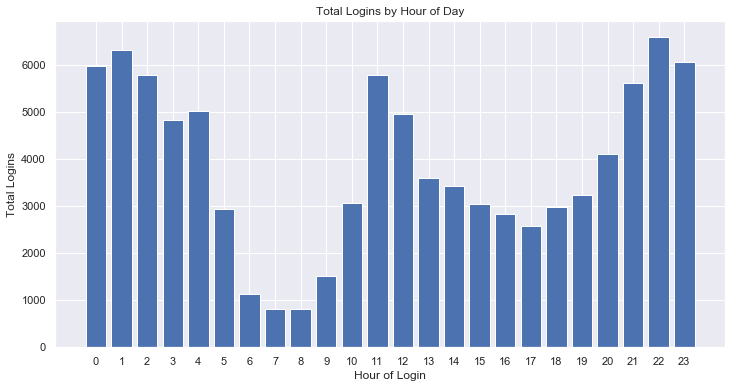

In [11]:
# Group by hour and plot total number of logins by time of day.
hourdf = logins.groupby('hour').sum()

sns.set()
plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(logins.hour), max(logins.hour)+1, 1.0))
plt.bar(hourdf.index, hourdf['count'])
plt.title('Total Logins by Hour of Day')
plt.xlabel('Hour of Login')
plt.ylabel('Total Logins')

The plot shows that the most logins occur during two different time periods: from 11:00am - 1:00pm (lunch time?) and 9:00pm - 3:00am (after dinner until bedtime, but some people staying up really late).

Text(0, 0.5, 'Total Logins')

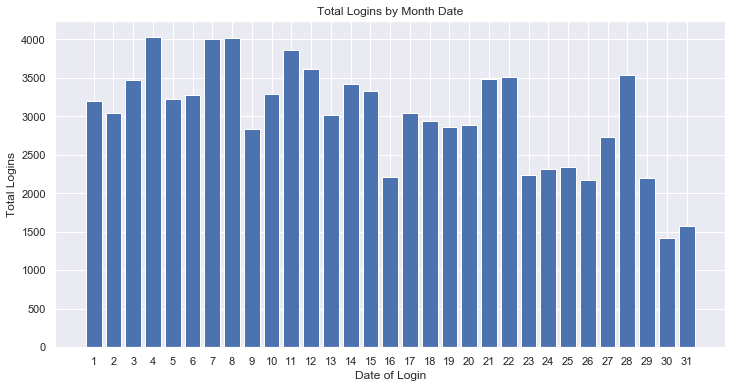

In [12]:
# Group by hour and plot total number of logins by time of day.
datedf = logins.groupby('date').sum()

sns.set()
plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(logins.date), max(logins.date)+1, 1.0))
plt.bar(datedf.index, datedf['count'])
plt.title('Total Logins by Month Date')
plt.xlabel('Date of Login')
plt.ylabel('Total Logins')

Although there doesn't seem to be any real pattern, the most logins are on the 4th, 7th and 8th of the month. 

Text(0, 0.5, 'Total Logins')

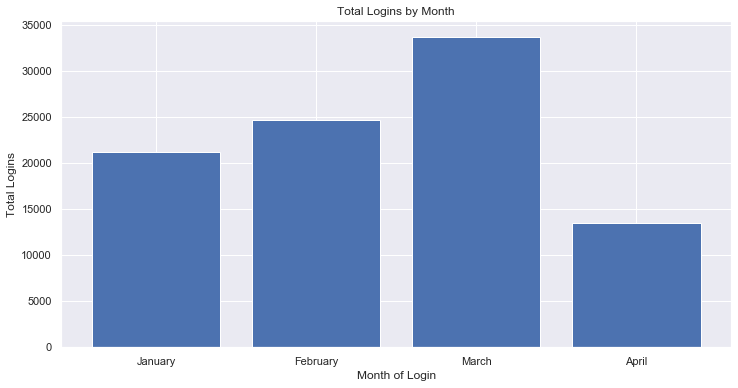

In [13]:
# Group by hour and plot total number of logins by time of day.
monthdf = logins.groupby('month').sum()

sns.set()
plt.figure(figsize=(12,6))
plt.xticks(monthdf.index, ['January', 'February', 'March', 'April'])
plt.bar(monthdf.index, monthdf['count'])
plt.title('Total Logins by Month')
plt.xlabel('Month of Login')
plt.ylabel('Total Logins')

Most logins were in March. Not really sure why, although there's not even half a month of data for April since last date in the dataset is April 13.

## **Part 2 ‑ Experiment and metrics design**
---
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
</P>
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


---

## **Question 1**

### *What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?*

### **Part 1**. The implementation of a toll bridge is an increase in the "cost of production" for trips that cross the bridge. This shifts the supply curve to the left and causes a decrease in the number of drivers providing trips across the toll bridge, assuming the price to the customer stays the same. The metric I would use is the number of tolls reimbursed. This measures the number of trips across the toll bridge, and since the goal of the experiment is to increase trips between the cities, this seems to be the best way to measure that.

## **Question 2**

### *Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*

####  a. How you will implement the experiment?
####  b. What statistical test(s) you will conduct to verify the significance of the observation?
####  c. How you would interpret the results and provide recommendations to the city operations team along with any caveats?

### **Part 2**. 

####  a. In order to test the effectiveness of reimbursing drivers for their toll bridge charges, the cities could implement a reimbursement program for a certain period of time. The drivers would be able to submit their toll bridge receipts to the city for reimbursement. There would need to be a way to measure trips both with and without the program in place. The time periods should be kept the same unless there is a reason to believe that time is not a differentiator (ie. weather, holidays, special events, pandemics, etc. are not influencing trips across the toll bridge)

####  b. The type of test would be a 1-sided z-statistic test. I would have the null hypothesis as: H0 - there is no difference between driver trips across the bridge, and H1 - the reimbursement program causes driver trips across the toll bridge to increase.

#### c. I would need to evaluate the amount of the difference, assuming there was one. If the difference is relatively small, the cost of the reimbursement program may not be worth it, at least economically. I'm guessing that the purpose of the program is to get residents to spend economic dollars in each others' cities, and if the program results in more tax revenue than the reimbursement program costs, I would recommend keeping the program.  

## **Part 3 ‑ Predictive Modeling**
---
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.</P>
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.</P>
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
</P>
  1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
  2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
  3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

---

**Data Description**
- **city**: city this user signed up in
- **phone**: primary device for this user
- **signup_date**: date of account registration; in the form ‘YYYYMMDD’
- **last_trip_date**: the last time this user completed a trip; in the form ‘YYYYMMDD’
- **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
- **avg_rating_by_driver**: the rider’s average rating over all of their trips
- **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
- **surge_pct**: the percent of trips taken with surge multiplier > 1
- **avg_surge**: The average surge multiplier over all of this user’s trips
- **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up
- **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- **weekday_pct**: the percent of the user’s trips occurring during a weekday


In [14]:
# Import json package. (Other needed packages were imported earlier.)
import json

# Read json file into variable.
with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)

# Create dataframe
df = pd.DataFrame(data)

In [15]:
# Check data types.
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [16]:
# Check for null values.
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

### The dataset has some missing values for 'avg_rating_of_driver (8,122), for 'phone' (396), and for 'avg_rating_by_driver' (201).

In [17]:
df['avg_rating_by_driver'].isnull().sum(), df['avg_rating_by_driver'].count(), df['avg_rating_by_driver'].isnull().sum() / df['avg_rating_by_driver'].count()

(201, 49799, 0.004036225627020623)

In [18]:
df['phone'].isnull().sum(), df['phone'].count(), df['phone'].isnull().sum() / df['phone'].count()

(396, 49604, 0.007983227159100072)

In [19]:
df['avg_rating_by_driver'].describe().T

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

### Since the number of missing values is less than one percent for 'avg_rating_by_driver' and less than one percent for 'phone', we'll drop these rows.

In [20]:
df.drop(df[df.avg_rating_by_driver.isnull()].index, inplace=True)
df.drop(df[df.phone.isnull()].index, inplace=True)

In [21]:
df['avg_rating_by_driver'].isnull().sum(), df['phone'].isnull().sum()

(0, 0)

Since there are over 8,000 missing values for 'avg_rating_of_driver', we'll just fill missing values with the mean.

In [22]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [23]:
df['avg_rating_of_driver'].isnull().sum()

0

In [24]:
# Convert date columns to date-time objects.
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [25]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [26]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [27]:
# Determine the lastest trip date in the dataset.
df['last_trip_date'].sort_values(ascending=False)

13504   2014-07-01
6776    2014-07-01
41521   2014-07-01
41511   2014-07-01
25109   2014-07-01
           ...    
5080    2014-01-01
15256   2014-01-01
22966   2014-01-01
34893   2014-01-01
39490   2014-01-01
Name: last_trip_date, Length: 49406, dtype: datetime64[ns]

### The latest trip date is July 1, 2014. So The 'active' label should be set to June 1, 2014, 30 days earlier.

In [28]:
# Create the 'active' column.
df['active'] = df['last_trip_date'] >= '2014-06-01'

In [29]:
import datetime
import seaborn as sns

last_day = max(df['last_trip_date'])
days = [last_day - datetime.timedelta(days=x) for x in range(0, 30)]
df['retained'] = df['last_trip_date'].map(lambda x: int(x in days))

In [30]:
active_df = df[df['retained'] == 1]
nonactive_df = df[df['retained'] == 0]
percent_active = (len(active_df) / len(df)) * 100
print('Retained Users %: {0}'.format(percent_active))

Retained Users %: 36.72833259118325


In [31]:
df['active'] = ((df['last_trip_date'] - df['signup_date']) / np.timedelta64(1, 'M')).\
        map(lambda x: 'active' if x > 5 else 'inactive')

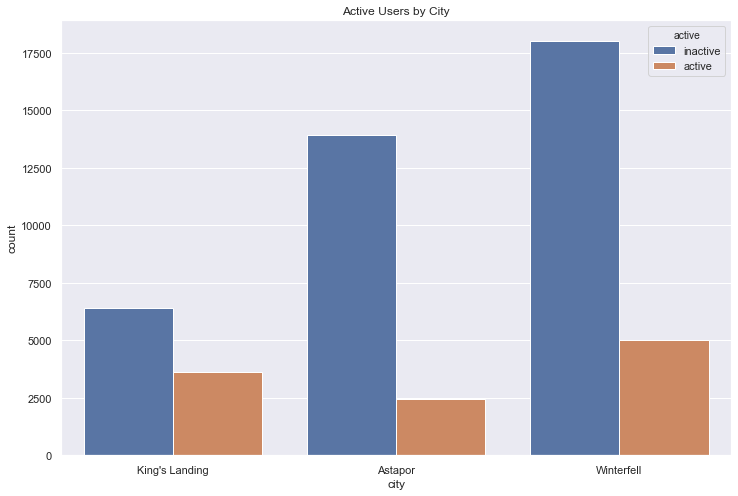

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='city', hue='active', data=df)
plt.title('Active Users by City')
plt.show()

### King's Landing seems to have a lower ratio of inactive:active users. 

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


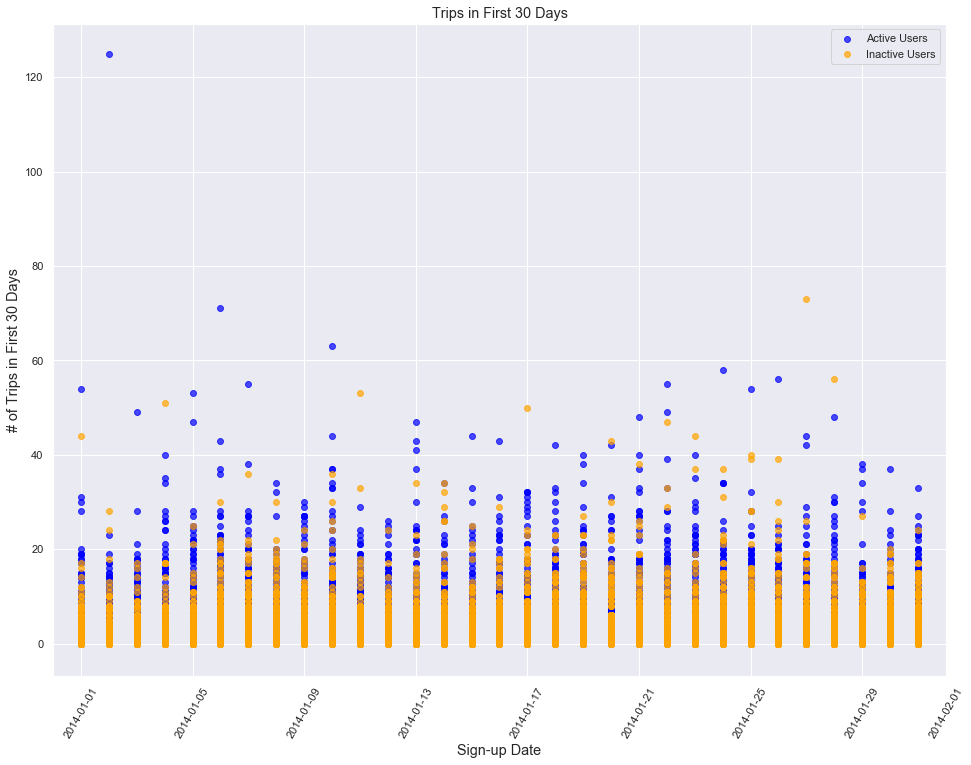

In [33]:
plt.figure(figsize=(16,12))
plt.scatter(active_df['signup_date'], active_df['trips_in_first_30_days'], alpha=0.7, color='blue')
plt.scatter(nonactive_df['signup_date'], nonactive_df['trips_in_first_30_days'], alpha=0.7, color='orange')
plt.xlim('2013-12-31', '2014-02-01')
plt.title('Trips in First 30 Days', size='large')
plt.xlabel('Sign-up Date', size='large')
plt.ylabel('# of Trips in First 30 Days', size='large')
plt.xticks(rotation=60)
plt.legend(['Active Users', 'Inactive Users'], loc='best')
plt.show()

### It appears that taking more trips in the first 30 days makes it more likely that a user will continue to be active in the sixth month. There are, however, several outliers.

<Figure size 1152x864 with 0 Axes>

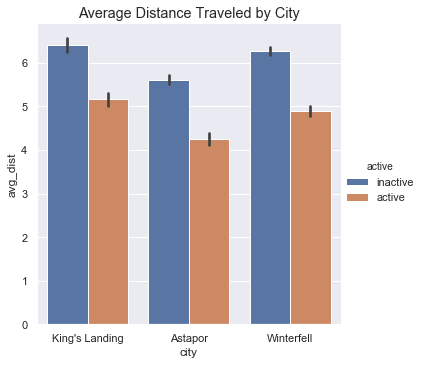

In [34]:
plt.figure(figsize=(16,12))
sns.catplot(x="city", y="avg_dist", hue='active', kind='bar', data=df)
plt.title("Average Distance Traveled by City", size='large')
plt.show()

### In all three cities, trips for inactive users were longer than active users. This may mean that active users travel shorter distances more frequently, not that the inactive users were necessarily unhappy with the trip.

## **Part 3 - Machine Learning**

In [35]:
# Create machine learning dataset.
model = df.copy()
model.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,inactive,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,inactive,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,inactive,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,active,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,inactive,0


In [36]:
# Convert Categorical Values.
city_dict = {"King's Landing": 1, 'Astapor': 2, 'Winterfell': 3}
phone_dict = {"iPhone": 1, "Android": 2}
black_dict = {True: 1, False: 0}
model['city'] = df['city'].replace(city_dict)
model['phone'] = df['phone'].replace(phone_dict)
model['ultimate_black_user'] = df['ultimate_black_user'].replace(black_dict)
model.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,retained
0,1,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,inactive,1
1,2,0,2014-01-29,5.0,1.00,2014-05-05,2,0.0,0,50.0,8.26,5.0,inactive,0
2,2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,inactive,0
3,1,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,active,1
4,3,14,2014-01-27,4.4,1.19,2014-03-15,2,11.8,0,82.4,3.13,4.9,inactive,0


In [37]:
# Drop unnecessary columns.
model = model.drop(['signup_date','last_trip_date','active'],axis=1)
model.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,1,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,1
1,2,0,5.0,1.00,2,0.0,0,50.0,8.26,5.0,0
2,2,3,4.3,1.00,1,0.0,0,100.0,0.77,5.0,0
3,1,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1
4,3,14,4.4,1.19,2,11.8,0,82.4,3.13,4.9,0


In [38]:
model.rename(columns={'retained': 'active'}, inplace=True)

In [39]:
model.corr()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
city,1.000000,0.011307,-0.104590,-0.012182,0.046447,-0.056155,-0.055384,-0.026270,0.011699,-0.107898,-0.168480
trips_in_first_30_days,0.011307,1.000000,-0.011596,-0.001118,-0.059649,0.006362,0.111717,0.050558,-0.138010,-0.038964,0.214530
avg_rating_of_driver,-0.104590,-0.011596,1.000000,-0.018292,0.024763,-0.001431,-0.003028,0.011174,0.029207,0.101459,-0.010162
avg_surge,-0.012182,-0.001118,-0.018292,1.000000,-0.009301,0.793140,-0.077239,-0.109939,-0.081848,0.010811,-0.003757
phone,0.046447,-0.059649,0.024763,-0.009301,1.000000,-0.010529,-0.073634,-0.009026,0.021414,0.009261,-0.233806
surge_pct,-0.056155,0.006362,-0.001431,0.793140,-0.010529,1.000000,-0.105450,-0.144785,-0.104622,0.020469,0.010396
ultimate_black_user,-0.055384,0.111717,-0.003028,-0.077239,-0.073634,-0.105450,1.000000,0.035799,0.033951,0.009292,0.211260
weekday_pct,-0.026270,0.050558,0.011174,-0.109939,-0.009026,-0.144785,0.035799,1.000000,0.102069,0.020128,0.026234
avg_dist,0.011699,-0.138010,0.029207,-0.081848,0.021414,-0.104622,0.033951,0.102069,1.000000,0.080251,-0.091155
avg_rating_by_driver,-0.107898,-0.038964,0.101459,0.010811,0.009261,0.020469,0.009292,0.020128,0.080251,1.000000,-0.025164


In [51]:
df = model.copy()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

columns = ['city','avg_rating_of_driver','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']

X = df[columns]
y = df['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.6, random_state=42)

pipeline = Pipeline(steps=[("encoder", OneHotEncoder()), \
                           ("rf", RandomForestClassifier(random_state = 42))])

params = {"rf__n_estimators" : [100, 200, 500],
          "rf__max_depth" : [10, 20, 50]}

cv = GridSearchCV(pipeline, param_grid=params, cv=3)
cv.fit(X_train, y_train)

print(f"Best parameters: {cv.best_params_}")
print(f"Training accuracy score from tuned model: \
       {cv.best_score_*100:.1f}%")

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


ValueError: unknown categorical feature present [79] during transform.

0.6
0.2
0.2


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import sklearn.model_selection

In [ ]:
# split out into train and test

features = model.drop('active', axis=1)
labels = model['active']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

In [44]:
tr_features = X_train
tr_labels = y_train

val_features = X_val
val_labels = y_val

te_features = X_test
te_labels = y_test

In [45]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)
scores

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

array([0.75324675, 0.75543937, 0.74228369, 0.75290943, 0.75080142])

In [46]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [47]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 50, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.784 (+/-0.008) for {'max_depth': 10, 'n_estimators': 100}
0.784 (+/-0.005) for {'max_depth': 10, 'n_estimators': 200}
0.765 (+/-0.004) for {'max_depth': 20, 'n_estimators': 100}
0.767 (+/-0.008) for {'max_depth': 20, 'n_estimators': 200}
0.761 (+/-0.008) for {'max_depth': 50, 'n_estimators': 100}
0.76 (+/-0.006) for {'max_depth': 50, 'n_estimators': 200}
0.761 (+/-0.009) for {'max_depth': None, 'n_estimators': 100}
0.762 (+/-0.007) for {'max_depth': None, 'n_estimators': 200}


## Fit best models on full training set

From above, the top three results came from:<br/>
0.932 (+/-0.003) for {'max_depth': 20, 'n_estimators': 500}
0.932 (+/-0.003) for {'max_depth': 20, 'n_estimators': 1000}
0.932 (+/-0.004) for {'max_depth': 50, 'n_estimators': 500}
0.932 (+/-0.003) for {'max_depth': 50, 'n_estimators': 1000}
0.932 (+/-0.003) for {'max_depth': None, 'n_estimators': 500}
0.932 (+/-0.003) for {'max_depth': None, 'n_estimators': 1000}

In [48]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=200, max_depth=20)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate models on validation set

In [49]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 200 -- A: 0.792 / P: 0.742 / R: 0.67
MAX DEPTH: 20 / # OF EST: 200 -- A: 0.773 / P: 0.698 / R: 0.678
MAX DEPTH: 20 / # OF EST: 100 -- A: 0.77 / P: 0.696 / R: 0.668


## Evaluate the best model on the test set

In [50]:
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 20 / # OF EST: 200 -- A: 0.774 / P: 0.698 / R: 0.66
